In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bitcoin_df = pd.read_csv(r'bitcoin_price_Training - Training.csv')

In [3]:
bitcoin_df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [4]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [5]:
bitcoin_df.shape

(1556, 7)

In [6]:
bitcoin_df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [7]:
bitcoin_df.duplicated().sum()

0

In [8]:
bitcoin_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1556.0,582.625328,523.137312,68.50,254.2875,438.600,662.4375,2953.22
High,1556.0,597.992847,542.992855,74.56,260.3275,447.560,674.5250,2999.91
Low,1556.0,567.851446,505.877401,65.53,248.8350,430.570,646.7350,2840.53
Close,1556.0,584.239396,525.904442,68.43,254.3200,438.855,663.4025,2958.11


In [9]:
bitcoin_df['Date'] = bitcoin_df['Date'].astype('datetime64[ns]')

In [10]:
bitcoin_df['Date'].min(), bitcoin_df['Date'].max()

(Timestamp('2013-04-28 00:00:00'), Timestamp('2017-07-31 00:00:00'))

### What was the change in price of the stock overtime?

In [11]:
data_new = bitcoin_df.sort_index(ascending=False).reset_index()

In [12]:
data_new

,index,Date,Open,High,Low,Close,Volume,Market Cap
0,1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
1,1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2,1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
3,1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
4,1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...,...,...
1551,4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
1552,3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
1553,2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
1554,1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"


In [13]:
data_new.drop('index', axis=1, inplace=True)

In [14]:
data_new.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

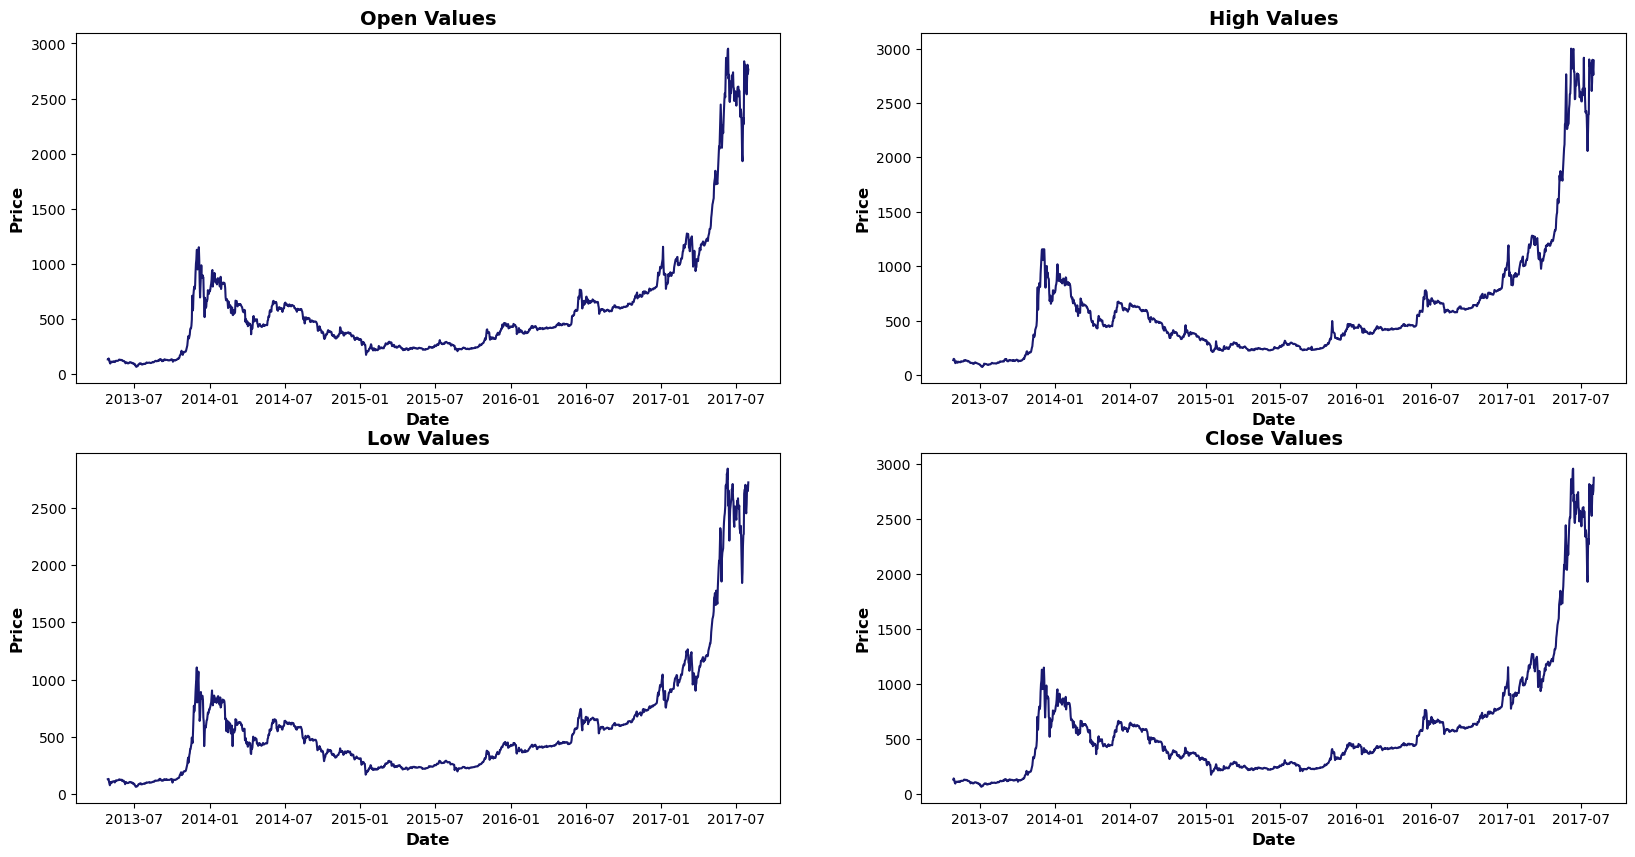

In [16]:
from turtle import color


plt.figure(figsize=(20,10))
for index,col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    plt.subplot(2,2,index)
    plt.plot(bitcoin_df['Date'],bitcoin_df[col], color='midnightblue')
    plt.xlabel('Date',fontsize=12, weight='bold')
    plt.ylabel('Price',fontsize=12, weight='bold')
    plt.title(col+' Values', fontsize=14, weight='bold')
    
plt.show()

#### Analysing prices using CandleStick Plot | Ohlc Plot for stock analysis

In [15]:
data_new.shape

(1556, 7)

In [17]:
bitcoin_sample = data_new[0:50]

In [ ]:
# %pip install chart_studio
# %pip install plotly

In [18]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [19]:
init_notebook_mode(connected=True)

In [20]:
trace = go.Candlestick(x=bitcoin_sample['Date'], 
               high=bitcoin_sample['High'],
               open=bitcoin_sample['Open'],
               close=bitcoin_sample['Close'],
               low=bitcoin_sample['Low'])

In [21]:
candle_data = [trace]

In [22]:
layout = {
    'title': 'Bitcoin Historical Price',
    'xaxis': {'title': 'Date'}
}

In [23]:
figure = go.Figure(data=candle_data, layout=layout)

figure.update_layout(xaxis_rangeslider_visible=False)
figure.show()

#### Analysing closing Prices

<Axes: >

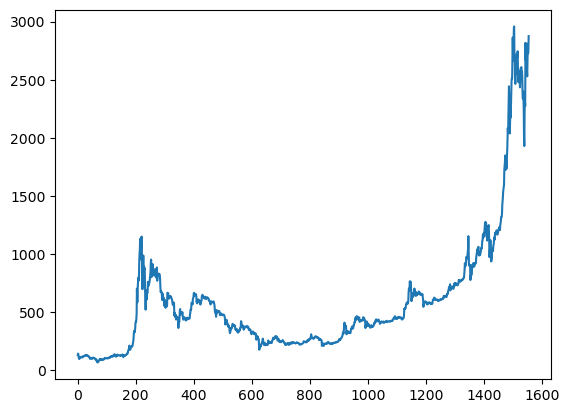

In [24]:
data_new['Close'].plot()

##### We need Date as index

In [25]:
data_new.set_index('Date', inplace=True)

In [26]:
data_new

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


<Axes: xlabel='Date'>

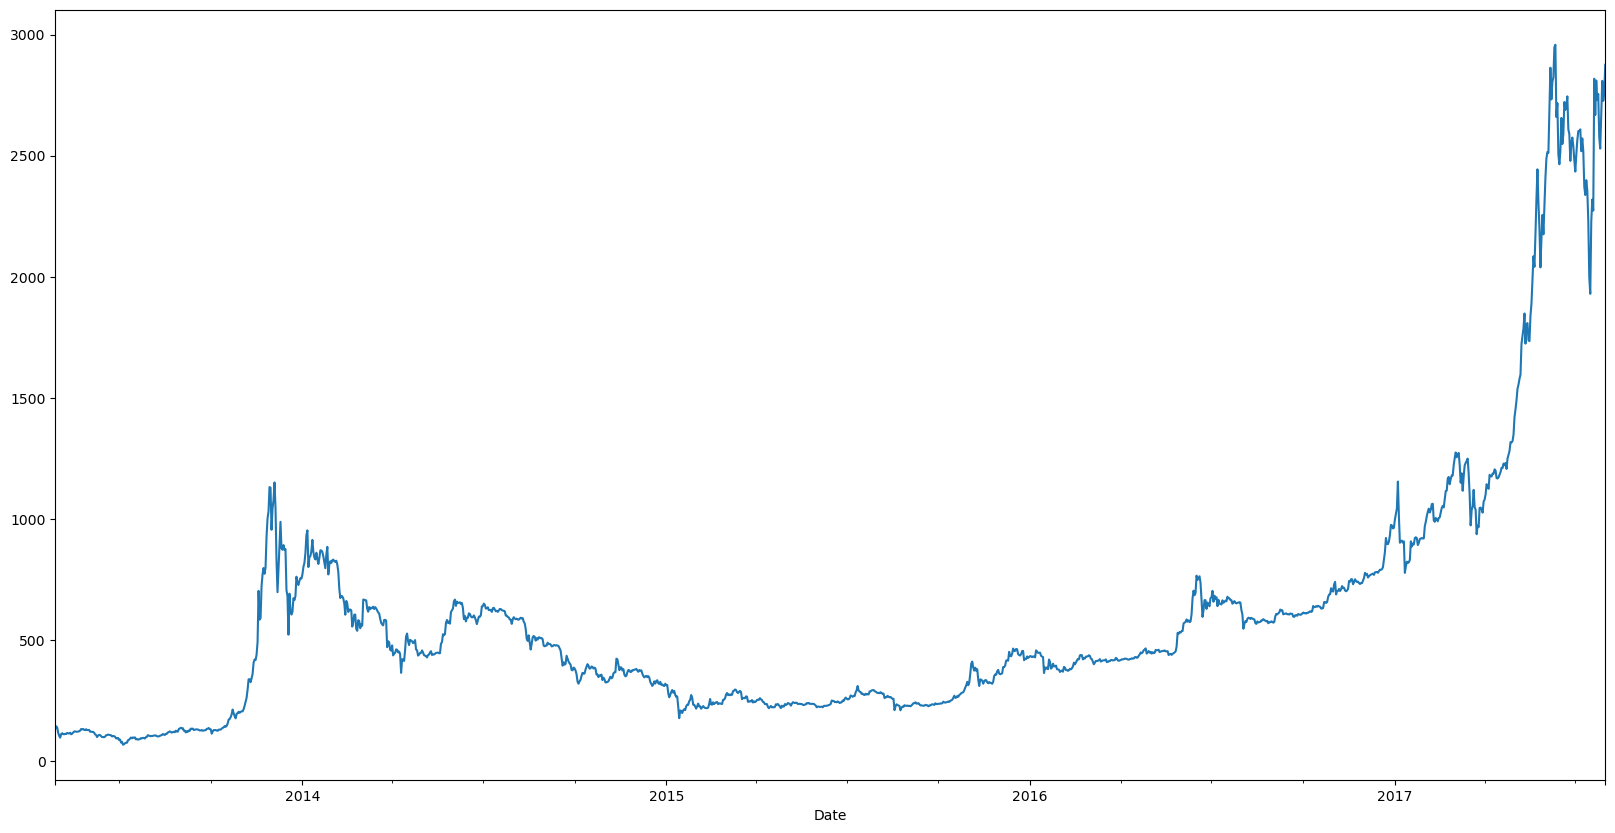

In [28]:
data_new['Close'].plot(figsize=(20,10))

#### Use Log scale for outliers values

Text(0.5, 1.0, 'Log Scaling')

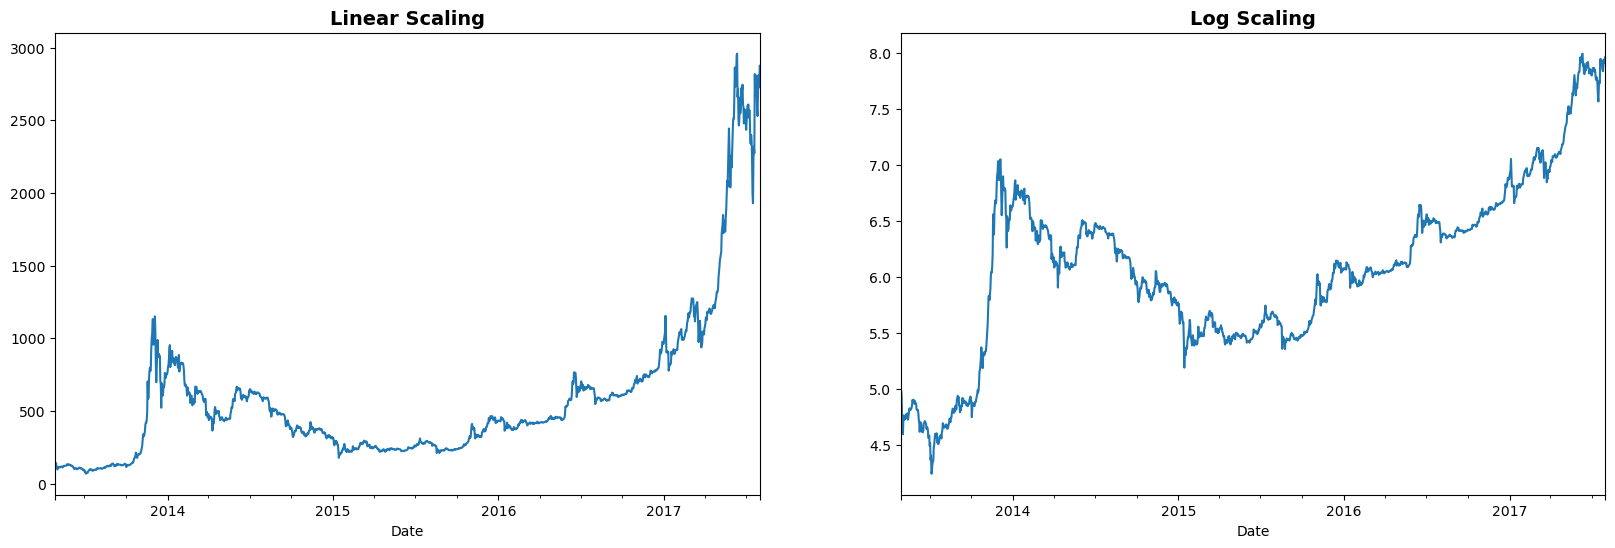

In [33]:
import numpy as np

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
data_new['Close'].plot()
plt.title('Linear Scaling', fontsize=14, weight='bold')

plt.subplot(1,2,2)
np.log1p(data_new['Close']).plot()
plt.title('Log Scaling', fontsize=14, weight='bold')

#### Analyse closing price on monthly, yearly, quarterly basis

#### yearly('Y'), monthly('M')
#### quarterly('Q'), weekly('W')
#### daily('D'), minutes('M')
#### 30 second bins ('305'), resample('17min')

In [34]:
data_new.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"


In [35]:
data_new['Close'].resample('Y').mean()

Date
2013-12-31     257.474476
2014-12-31     527.236658
2015-12-31     272.453260
2016-12-31     568.492131
2017-12-31    1628.622123
Freq: A-DEC, Name: Close, dtype: float64

<Axes: xlabel='Date'>

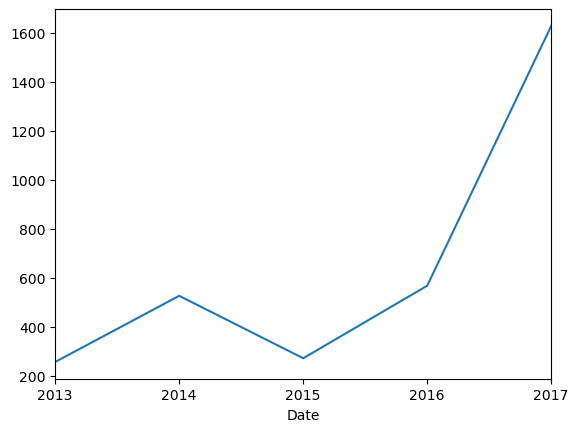

In [36]:
data_new['Close'].resample('Y').mean().plot()

<Axes: xlabel='Date'>

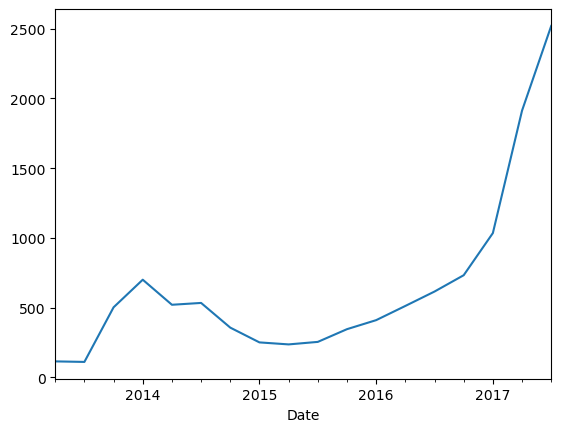

In [38]:
data_new['Close'].resample('Q').mean().plot()

<Axes: xlabel='Date'>

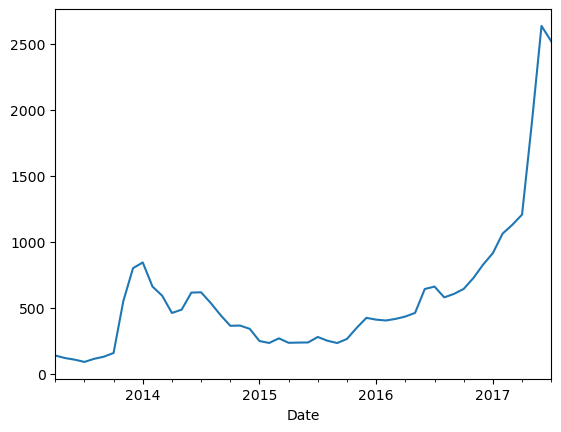

In [37]:
data_new['Close'].resample('M').mean().plot()

#### Analysing Daily change in closing price of stocks

In [39]:
# date on x axis, percentage change in daily basis for y axis
data_new

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
...,...,...,...,...,...,...
2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


In [43]:
data_new['Close']

Date
2013-04-28     134.21
2013-04-29     144.54
2013-04-30     139.00
2013-05-01     116.99
2013-05-02     105.21
               ...   
2017-07-27    2671.78
2017-07-28    2809.01
2017-07-29    2726.45
2017-07-30    2757.18
2017-07-31    2875.34
Name: Close, Length: 1556, dtype: float64

In [44]:
# Calculate percentage changes in each row
data_new['Close_pct_change'] = data_new['Close'].pct_change()*100

In [45]:
data_new['Close_pct_change']

Date
2013-04-28          NaN
2013-04-29     7.696893
2013-04-30    -3.832849
2013-05-01   -15.834532
2013-05-02   -10.069237
                ...    
2017-07-27     5.626915
2017-07-28     5.136276
2017-07-29    -2.939114
2017-07-30     1.127107
2017-07-31     4.285538
Name: Close_pct_change, Length: 1556, dtype: float64

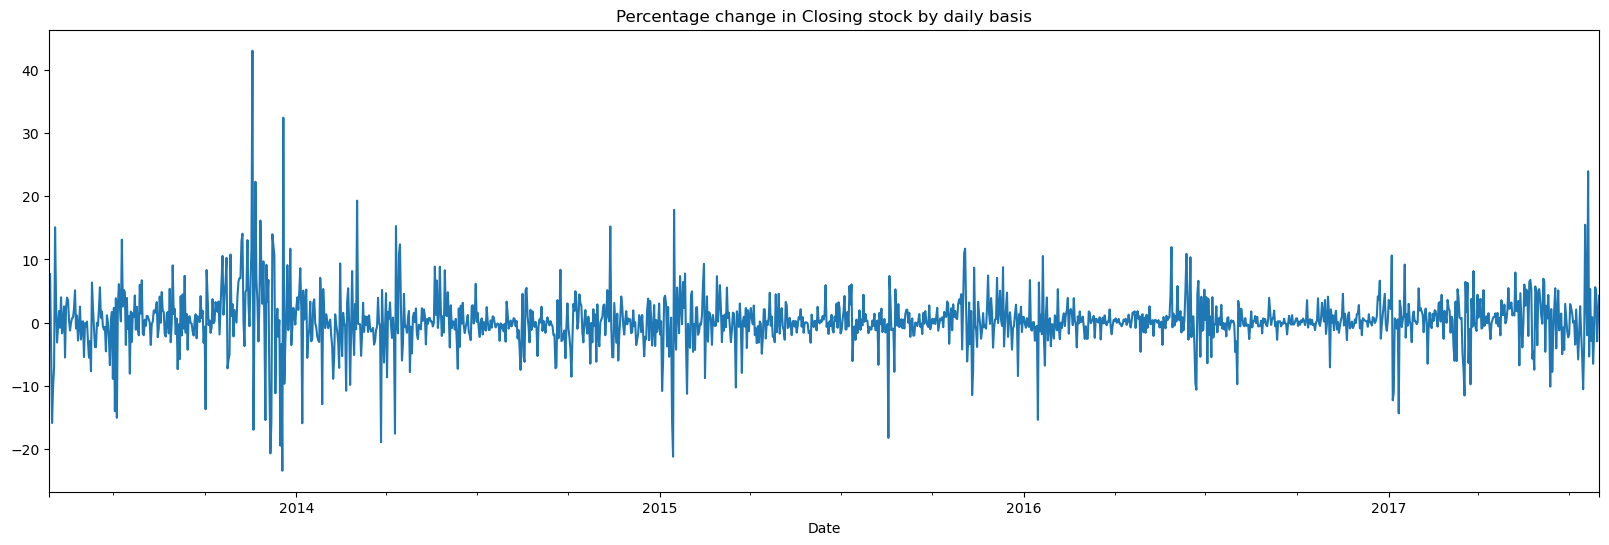

In [51]:
data_new['Close_pct_change'].plot(figsize=(20,6), title='Percentage change in Closing stock by daily basis')
plt.show()

In [52]:
# %pip install cufflinks

Note: you may need to restart the kernel to use updated packages.Collecting cufflinks
     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ------------------------------ --------- 61.4/81.7 kB 1.7 MB/s eta 0:00:01
     ---------------------------------------- 81.7/81.7 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for colorlover>=0.2.1 from https://files.pythonhosted.org/packages/9a/53/f696e4480b1d1de3b1523991dea71cf417c8b19fe70c704da164f3f90972/colorlover-0.3.0-py3-none-any.whl.metadata
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=9adb1f8b60d0467e05fe4320e84919c32fe3d4044812740618fba34a5222ab09
  Stored in directory: c:\users\than aung kyaw\appdata\local\pip\cache\wheels\c3\bf\8f\afa0730b29e347e8c1071049f89748c1262e7a14a838820ae6
Successfully built cufflinks



In [53]:
import cufflinks as cf

c:\Users\Than Aung Kyaw\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [54]:
cf.go_offline()

In [55]:
type(data_new['Close_pct_change'])

pandas.core.series.Series

In [57]:
# Requires internet connection
data_new['Close_pct_change'].iplot()